<center> <h2><big><font color='#FF5733'> Projet:Fouille de Données </font><big></h2></center>

<center><h2><big><font color ='FF5733'> Thème</font><big></h2></center>
<center><h2><big><font color='#5C4545'>Classification des Tweets </font><big></h2></center>

<h2><font color ='FF5733'>1.API key from tweets developper account </font></h2>


In [7]:
import tweepy

# authorization tokens
consumer_key = "Tippg04Ns8bfIZtE3uMprKEym" 
consumer_secret = "qHjBkD4CBX67rHPenKu96c7W5Tsv59t9BGBVsm0pXM0oLatOS8"
access_key= "1328070400136400905-ZOCtds4L0DD3LqMJ2r9rZHSyAi75Xu"
access_secret = "qX3pBBD42A1dAZDPXx2DGcH0T0hcr4e5Oxw40YwR9wTnc"

<h2><font color ='FF5733'>2.Collecting tweets </font></h2>

In [ ]:
# function to display data of each tweet 
def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:") 
    print(f"Username:{ith_tweet[0]}") 
    print(f"Description:{ith_tweet[1]}") 
    print(f"Location:{ith_tweet[2]}") 
    print(f"Following Count:{ith_tweet[3]}") 
    print(f"Follower Count:{ith_tweet[4]}") 
    print(f"Total Tweets:{ith_tweet[5]}") 
    print(f"Retweet Count:{ith_tweet[6]}") 
    print(f"Tweet Text:{ith_tweet[7]}") 
    print(f"Hashtags Used:{ith_tweet[8]}") 
  
  
# function to perform data extraction 
def scrape(words, date_since, numtweet): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets: 
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
          
        # Retweets can be distinguished by a retweeted_status attribute, 
        # in case it is an invalid reference, except block will be executed 
        try: 
            text = tweet.retweeted_status.full_text 
        except AttributeError: 
            text = tweet.full_text 
        hashtext = list() 
        for j in range(0, len(hashtags)): 
            hashtext.append(hashtags[j]['text']) 
          
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
        printtweetdata(i, ith_tweet) 
        i = i+1
    filename = 'scraped_tweets5.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 
  
  
 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_key, access_secret) 
api = tweepy.API(auth,wait_on_rate_limit=True) 
      
    # Enter Hashtag and initial date 
print("Enter Twitter HashTag to search for") 
words = input() 
print("Enter Date since The Tweets are required in yyyy-mm--dd") 
date_since = input() 
      
    # number of tweets you want to extract in one run 
numtweet = 3000 
scrape(words, date_since, numtweet) 
print('Scraping has completed!')

 <h2><font color ='FF5733'>3.Exploration des données</font> </h2>

In [9]:
#import pandas as pd
#df=pd.read_csv('scraped_tweets5.csv')
#print(df.shape)
#df.head(20)

In [10]:
##import pandas as pd
##df_1=pd.read_csv('final.csv')
##print(df_1.shape)
##df_1.head(20)

In [95]:
#Jusq'au la on a reussi a collecter deux datasets,Je vais les concatiner et l'enregister dans un seul fichier CSV
df_final=pd.concat([df, df_1], ignore_index=True)
print(df_final.shape)
df_final.head()

(19096, 11)


,text,text_tokenized,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,hashtags
0,Biden can t even keep up with a teleprompte...,biden can t even keep up with a teleprompt wit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,If you or someone you know may be considering ...,if you or someon you know may be consid suicid...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bonus Item Text Upgrade My amazing Patrons ...,bonus item text upgrad my amaz patron support ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,text me ASAp y all,text me asap y all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Talking about suicide does not promote the ide...,talk about suicid doe not promot the idea of s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import pandas as pd
#df_final.to_csv('final.csv',index=False)
df=pd.read_csv('final.csv')
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,RDukum,Attorney AMA - I get dumb people to admit they...,"Arizona, USA",475,68,2415,0,@carolki13 @KeithGrant09 @JoeBiden Biden can’t...,[]
1,1,MalSantoDiego,Was born and isn't dead yet.,"Austin, TX",692,76,4786,77,If you or someone you know may be considering ...,[]
2,2,DwayneKroohs,Social media vanguard and editor.,NaN,241,82,1242,77,If you or someone you know may be considering ...,[]
3,3,smits_scott,Have you all heard about Twitter?,"Milwaukee, WI",399,44,470,4,Bonus Item: Text Upgrade.\n\nMy amazing Patron...,[]
4,4,SarahSassenach,Mother and lover of all great characters.,NaN,218,338,33341,77,If you or someone you know may be considering ...,[]


In [12]:
# affichage d'informations sur les données 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10985 entries, 0 to 10984
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10985 non-null  int64 
 1   username      10985 non-null  object
 2   description   9875 non-null   object
 3   location      7732 non-null   object
 4   following     10985 non-null  int64 
 5   followers     10985 non-null  int64 
 6   totaltweets   10985 non-null  int64 
 7   retweetcount  10985 non-null  int64 
 8   text          10985 non-null  object
 9   hashtags      10985 non-null  object
dtypes: int64(5), object(5)
memory usage: 858.3+ KB


In [13]:
to_drop = ['Unnamed: 0',
           'username',
           'description',
           'location',
           'following',
           'followers',
           'totaltweets',
           'retweetcount',
           'hashtags']
#Eliminer les colonnes dans la liste de to_drop du dataframe df
df.drop(to_drop, inplace=True, axis=1)
#Afficherle résultat
df.head()

,text
0,@carolki13 @KeithGrant09 @JoeBiden Biden can’t...
1,If you or someone you know may be considering ...
2,If you or someone you know may be considering ...
3,Bonus Item: Text Upgrade.\n\nMy amazing Patron...
4,If you or someone you know may be considering ...


<h2><font color ='FF5733'> 4.Cleaning Data </font></h2>

In [14]:
import numpy as np
import re
#We will use this function to remove the pattern ‘@user’ from all the tweets in our data.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 
# remove twitter handles (@user)
df['text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
#remove hashtags
df['text'] = np.vectorize(remove_pattern)(df['text'], "#[\w]*")
#remove URL
df['text'] = np.vectorize(remove_pattern)(df['text'], "http[\w]*")

In [15]:
#Supprimer les lignes dupliquées
df = df.drop_duplicates(ignore_index =True)
print(df.shape)

(8111, 1)


In [16]:
df.head(20)

,text
0,Biden can’t even keep up with a teleprompte...
1,If you or someone you know may be considering ...
2,Bonus Item: Text Upgrade.\n\nMy amazing Patron...
3,(575) 519-5796 text me ASAp y’all
4,Talking about suicide does not promote the ide...
5,Brilliant night with Father Christmas and in ...
6,What is the meaning of this text ??
7,Watch Seth Grimes dive into the representation...
8,President Trump really wants YOU on his team a...
9,"choose your font and size of choice, type a w..."


In [17]:
# remove special characters, numbers, punctuations
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df.head(20)

,text
0,Biden can t even keep up with a teleprompte...
1,If you or someone you know may be considering ...
2,Bonus Item Text Upgrade My amazing Patrons ...
3,text me ASAp y all
4,Talking about suicide does not promote the ide...
5,Brilliant night with Father Christmas and in ...
6,What is the meaning of this text
7,Watch Seth Grimes dive into the representation...
8,President Trump really wants YOU on his team a...
9,choose your font and size of choice type a w...


In [18]:
print(df.shape)
df.drop_duplicates()
print("apres",df.shape)

(8111, 1)
apres (8111, 1)


<h2><font color ='FF5733'> 5.text analysis with nltk : Nature language toolkit</font></h2>

In [19]:
tokenized_tweet = df['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Biden, can, t, even, keep, up, with, a, telep...
1    [If, you, or, someone, you, know, may, be, con...
2    [Bonus, Item, Text, Upgrade, My, amazing, Patr...
3                             [text, me, ASAp, y, all]
4    [Talking, about, suicide, does, not, promote, ...
Name: text, dtype: object

<h2><font color ='FF5733'> stemming and lemmatization </font></h2>

In [20]:
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
stemmer = PorterStemmer()
stemm= LancasterStemmer()
sn_stemmer=SnowballStemmer("english")
tokenized_tweet= tokenized_tweet.apply(lambda x: [sn_stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head(20)

0     [biden, can, t, even, keep, up, with, a, telep...
1     [if, you, or, someon, you, know, may, be, cons...
2     [bonus, item, text, upgrad, my, amaz, patron, ...
3                              [text, me, asap, y, all]
4     [talk, about, suicid, doe, not, promot, the, i...
5     [brilliant, night, with, father, christma, and...
6                 [what, is, the, mean, of, this, text]
7     [watch, seth, grime, dive, into, the, represen...
8     [presid, trump, realli, want, you, on, his, te...
9     [choos, your, font, and, size, of, choic, type...
10    [don, t, text, her, pleas, yes, she, s, in, la...
11                    [imma, just, text, him, im, bore]
12    [if, an, object, is, made, by, at, least, one,...
13    [i, ve, been, address, by, differ, name, via, ...
14    [the, day, you, ll, need, k, sharpli, you, ll,...
15                    [doe, he, sign, everi, text, dad]
16    [cctv, video, amp, audio, from, poll, locat, t...
17    [am, i, the, onli, one, who, notic, when, 

In [21]:
import nltk
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [wordnet_lemmatizer.lemmatize(i) for i in x]) # lemmatize
tokenized_tweet.head(20)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouala\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0     [biden, can, t, even, keep, up, with, a, telep...
1     [if, you, or, someon, you, know, may, be, cons...
2     [bonus, item, text, upgrad, my, amaz, patron, ...
3                              [text, me, asap, y, all]
4     [talk, about, suicid, doe, not, promot, the, i...
5     [brilliant, night, with, father, christma, and...
6                 [what, is, the, mean, of, this, text]
7     [watch, seth, grime, dive, into, the, represen...
8     [presid, trump, realli, want, you, on, his, te...
9     [choos, your, font, and, size, of, choic, type...
10    [don, t, text, her, plea, yes, she, s, in, lag...
11                    [imma, just, text, him, im, bore]
12    [if, an, object, is, made, by, at, least, one,...
13    [i, ve, been, address, by, differ, name, via, ...
14    [the, day, you, ll, need, k, sharpli, you, ll,...
15                    [doe, he, sign, everi, text, dad]
16    [cctv, video, amp, audio, from, poll, locat, t...
17    [am, i, the, onli, one, who, notic, when, 

<h2><font color ='FF5733'>Elimination des stopwords </font></h2>

In [22]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

{'few', 'to', 'them', 'on', 'i', 'where', 'only', 'o', "doesn't", 'now', 'during', 'any', "mightn't", 'because', "should've", 'with', 'nor', 'is', 'itself', 'having', 'not', 'himself', 'him', 'have', 'wasn', 'haven', 't', 'each', 'from', 'here', 'out', 'your', 'before', 'of', 'most', "she's", "haven't", "you've", 'does', 'hadn', 'did', 'then', "mustn't", 'over', 'hers', 've', 'be', 'don', 'and', "you'd", 'a', 'by', 'below', 'had', 'shan', 'both', 'herself', 'theirs', 'couldn', 'being', 'off', 'as', 'all', 's', 'until', "hadn't", 'needn', 'between', 'for', "aren't", 'after', 'who', "wasn't", 'so', 'about', "needn't", "it's", "that'll", 'into', "didn't", 'he', 'at', 'won', 'but', 'y', "shan't", 'they', "you're", 'do', 'very', 'aren', 'themselves', 'just', "couldn't", 'hasn', 'such', 'further', 'wouldn', 'under', 'again', "isn't", 'their', 'which', 'if', 'this', 'against', 'through', 'than', 'll', 'ain', 'why', "won't", 'more', 'once', 'yourself', 'his', 'mightn', 'has', 'me', "you'll", '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])

0                   [biden, even, keep, teleprompt, text]
1       [someon, know, may, consid, suicid, contact, n...
2       [bonus, item, text, upgrad, amaz, patron, supp...
3                                            [text, asap]
4       [talk, suicid, doe, promot, idea, suicid, some...
                              ...                        
8106    [whi, hear, benni, hill, music, watch, co, egg...
8107    [got, moonlight, starlight, need, night, come,...
8108    [im, talent, hungri, hard, work, west, coast, ...
8109    [hello, san, diego, hope, everyon, continu, st...
8110    [jibeom, wanna, talk, music, especi, hyukoh, c...
Name: text, Length: 8111, dtype: object

In [24]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=set(tokenized_tweet[i])
print(len(tokenized_tweet))

8111


In [25]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df["text_tokenized"] = tokenized_tweet
df.head()

,text,text_tokenized
0,Biden can t even keep up with a teleprompte...,biden with up can a over keep even text telepr...
1,If you or someone you know may be considering ...,lifelin be to may the and en by espa contact y...
2,Bonus Item Text Upgrade My amazing Patrons ...,be to the i miss don support amaz patron text ...
3,text me ASAp y all,me asap y text all
4,Talking about suicide does not promote the ide...,to talk the you text atxl know if someon is co...


<h2><font color ='FF5733'> Vectorisation </font></h2>

<strong><span style='color:black'>TF-IDF est une mesure statistique qui évalue la pertinence d'un mot par rapport à un document dans une collection de documents. 
Cela se fait en multipliant deux mesures: le nombre de fois qu'un mot apparaît dans un document et la fréquence inverse du mot dans un ensemble de documents </span></strong>

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf vectorizer of scikit learn
vectorizer = TfidfVectorizer(stop_words=stop_words,max_features=3000, max_df = 0.5, use_idf = True, ngram_range=(1,3))
X = vectorizer.fit_transform(df['text_tokenized'])
print(X.shape) # check shape of the document-term matrix
terms = vectorizer.get_feature_names()
print(terms)

(8111, 3000)
['ab', 'abl', 'abl starter', 'abl starter mark', 'abov', 'absolut', 'abt', 'abus', 'accept', 'access', 'accord', 'account', 'account co', 'accur', 'achiev', 'across', 'act', 'action', 'activ', 'actor', 'actual', 'ad', 'add', 'addict', 'addit', 'address', 'administr', 'admit', 'adopt', 'adult', 'advanc', 'adventur', 'advic', 'af', 'afc', 'affect', 'afford', 'african', 'afternoon', 'age', 'agent', 'ago', 'agre', 'ah', 'ahead', 'air', 'al', 'album', 'album new', 'album year', 'alert', 'alex', 'allah', 'allen', 'allow', 'almighti', 'almost', 'alon', 'along', 'alreadi', 'alright', 'also', 'also determin', 'also determin mani', 'also think', 'also wa', 'alt', 'although', 'alway', 'amapiano', 'amaz', 'amazon', 'amazon gt', 'amazon gt buy', 'ameen', 'america', 'america sport', 'america sport card', 'american', 'american tomahawk', 'american tomahawk genocid', 'amin', 'among', 'amount', 'amp', 'amp game', 'amp get', 'amp like', 'amp music', 'amp woman', 'amp world', 'analysi', 'ana

<h2><font color ='FF5733'>6.clustering </font></h2>

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import logging
n_cluster = [3,5,8,10,14,16,20,23,26,30]
ineratias = []
scores = []
for i in n_cluster:
    model=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    model.fit(X)
    labes=model.labels_
    scores.append(silhouette_score(X,labes))
    ineratias.append(model.inertia_)

Initialization complete
Iteration 0, inertia 15475.314374796477
Iteration 1, inertia 7827.934532647777
Iteration 2, inertia 7819.0035889695055
Iteration 3, inertia 7813.6899957498545
Iteration 4, inertia 7809.616387907026
Iteration 5, inertia 7808.100346730612
Iteration 6, inertia 7807.222578682472
Iteration 7, inertia 7806.2376275550105
Iteration 8, inertia 7805.441572156934
Iteration 9, inertia 7804.974413430338
Iteration 10, inertia 7804.563782586214
Iteration 11, inertia 7804.24966210496
Iteration 12, inertia 7804.101586838996
Iteration 13, inertia 7803.958626912187
Iteration 14, inertia 7803.819901736618
Iteration 15, inertia 7803.73139306355
Iteration 16, inertia 7803.681406415397
Iteration 17, inertia 7803.659006405333
Iteration 18, inertia 7803.643455560345
Iteration 19, inertia 7803.639333314396
Iteration 20, inertia 7803.634190846189
Iteration 21, inertia 7803.61968159304
Iteration 22, inertia 7803.617719002971
Converged at iteration 22: strict convergence.
Initialization com

Iteration 9, inertia 7803.383360003491
Iteration 10, inertia 7803.203682087984
Iteration 11, inertia 7803.076913782747
Iteration 12, inertia 7803.017911791272
Iteration 13, inertia 7802.98590578644
Iteration 14, inertia 7802.965188579969
Iteration 15, inertia 7802.9416149070985
Iteration 16, inertia 7802.912587634369
Iteration 17, inertia 7802.857402693797
Iteration 18, inertia 7802.799479769092
Iteration 19, inertia 7802.7484053705675
Iteration 20, inertia 7802.730377755571
Iteration 21, inertia 7802.708478537658
Iteration 22, inertia 7802.704730089871
Iteration 23, inertia 7802.70398291852
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 15273.073003844387
Iteration 1, inertia 7793.420155384463
Iteration 2, inertia 7760.144997299771
Iteration 3, inertia 7745.311890907982
Iteration 4, inertia 7736.399001670616
Iteration 5, inertia 7734.841989663897
Iteration 6, inertia 7734.128399810118
Iteration 7, inertia 7733.589226008594
Iteration 8, iner

Iteration 20, inertia 7697.653094247074
Iteration 21, inertia 7697.516773301855
Iteration 22, inertia 7697.36392669612
Iteration 23, inertia 7697.301041350438
Iteration 24, inertia 7697.21938175035
Iteration 25, inertia 7697.11264103852
Iteration 26, inertia 7697.075921620437
Iteration 27, inertia 7696.978543764696
Iteration 28, inertia 7696.741969922253
Iteration 29, inertia 7696.644952518426
Iteration 30, inertia 7696.499699100648
Iteration 31, inertia 7696.340796244058
Iteration 32, inertia 7696.317790846759
Iteration 33, inertia 7696.316789310045
Converged at iteration 33: strict convergence.
Initialization complete
Iteration 0, inertia 15235.630034380654
Iteration 1, inertia 7782.12843897516
Iteration 2, inertia 7757.572518760139
Iteration 3, inertia 7729.562315295446
Iteration 4, inertia 7707.607153174982
Iteration 5, inertia 7697.657446269578
Iteration 6, inertia 7689.72630025723
Iteration 7, inertia 7681.615529062427
Iteration 8, inertia 7673.725935741186
Iteration 9, inertia 7

Initialization complete
Iteration 0, inertia 14832.068512535825
Iteration 1, inertia 7703.536378027012
Iteration 2, inertia 7616.673119904284
Iteration 3, inertia 7595.935264290556
Iteration 4, inertia 7584.646512135865
Iteration 5, inertia 7577.732546463875
Iteration 6, inertia 7573.9818730563375
Iteration 7, inertia 7570.87625941932
Iteration 8, inertia 7567.4494647857355
Iteration 9, inertia 7564.382681713705
Iteration 10, inertia 7563.09494934752
Iteration 11, inertia 7562.23359570418
Iteration 12, inertia 7561.3191392248655
Iteration 13, inertia 7559.306899821573
Iteration 14, inertia 7557.255182071734
Iteration 15, inertia 7556.829445936789
Iteration 16, inertia 7556.408762911012
Iteration 17, inertia 7555.9997042184605
Iteration 18, inertia 7555.312644161671
Iteration 19, inertia 7554.827595866051
Iteration 20, inertia 7554.6481173467955
Iteration 21, inertia 7554.4724881637485
Iteration 22, inertia 7554.1404079627255
Iteration 23, inertia 7553.0328663635655
Iteration 24, inerti

Iteration 28, inertia 7490.003045391589
Iteration 29, inertia 7489.93866123936
Iteration 30, inertia 7489.819437209766
Iteration 31, inertia 7489.739418220687
Iteration 32, inertia 7489.710683923684
Iteration 33, inertia 7489.698893355228
Iteration 34, inertia 7489.690095099574
Converged at iteration 34: strict convergence.
Initialization complete
Iteration 0, inertia 14776.841574561124
Iteration 1, inertia 7696.5451669981685
Iteration 2, inertia 7625.832228137155
Iteration 3, inertia 7609.198768824732
Iteration 4, inertia 7597.836108623587
Iteration 5, inertia 7588.64979812783
Iteration 6, inertia 7576.112392841402
Iteration 7, inertia 7565.586961989275
Iteration 8, inertia 7559.427801568262
Iteration 9, inertia 7557.691018037783
Iteration 10, inertia 7557.154202529914
Iteration 11, inertia 7556.522665696804
Iteration 12, inertia 7555.947164503942
Iteration 13, inertia 7555.1929057814905
Iteration 14, inertia 7554.27599491563
Iteration 15, inertia 7553.25717784746
Iteration 16, inerti

Iteration 27, inertia 7484.259439757351
Iteration 28, inertia 7484.182651582089
Iteration 29, inertia 7484.0349150974625
Iteration 30, inertia 7483.7146272050995
Iteration 31, inertia 7482.507118010251
Iteration 32, inertia 7480.359673797634
Iteration 33, inertia 7479.46190979437
Iteration 34, inertia 7479.135673350091
Iteration 35, inertia 7479.083935836777
Iteration 36, inertia 7479.058456697166
Iteration 37, inertia 7479.049722833675
Iteration 38, inertia 7479.048316592275
Converged at iteration 38: strict convergence.
Initialization complete
Iteration 0, inertia 13863.36046758771
Iteration 1, inertia 7637.155095335306
Iteration 2, inertia 7583.0038977865315
Iteration 3, inertia 7566.266905626989
Iteration 4, inertia 7554.852771503012
Iteration 5, inertia 7545.027556785835
Iteration 6, inertia 7536.588199421405
Iteration 7, inertia 7529.286365079604
Iteration 8, inertia 7522.999225507844
Iteration 9, inertia 7516.472314288292
Iteration 10, inertia 7509.543932715217
Iteration 11, ine

Iteration 30, inertia 7442.886287325664
Iteration 31, inertia 7442.734706239602
Iteration 32, inertia 7442.673626069629
Iteration 33, inertia 7442.6151581299
Iteration 34, inertia 7442.463744099228
Iteration 35, inertia 7442.301553755905
Iteration 36, inertia 7441.960666036695
Iteration 37, inertia 7440.975122478466
Iteration 38, inertia 7438.9075522980565
Iteration 39, inertia 7438.849379934654
Converged at iteration 39: strict convergence.
Initialization complete
Iteration 0, inertia 14169.05408981044
Iteration 1, inertia 7646.8715111557285
Iteration 2, inertia 7535.578035789911
Iteration 3, inertia 7496.072615850023
Iteration 4, inertia 7482.371173951058
Iteration 5, inertia 7470.780495830199
Iteration 6, inertia 7460.612202413986
Iteration 7, inertia 7451.22485945958
Iteration 8, inertia 7446.845539177316
Iteration 9, inertia 7443.502970844018
Iteration 10, inertia 7440.9811773320935
Iteration 11, inertia 7439.937870502939
Iteration 12, inertia 7438.979711204129
Iteration 13, inert

Iteration 14, inertia 7376.00402434171
Iteration 15, inertia 7375.906914431621
Iteration 16, inertia 7375.852337058077
Iteration 17, inertia 7375.832882381954
Iteration 18, inertia 7375.824501835641
Iteration 19, inertia 7375.822196845223
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 14275.946866820032
Iteration 1, inertia 7628.144161505245
Iteration 2, inertia 7543.428536983174
Iteration 3, inertia 7519.027775786389
Iteration 4, inertia 7489.902378375033
Iteration 5, inertia 7445.020943427122
Iteration 6, inertia 7406.6603392940115
Iteration 7, inertia 7392.5988683392425
Iteration 8, inertia 7384.562324980351
Iteration 9, inertia 7383.0662360457145
Iteration 10, inertia 7382.24581530741
Iteration 11, inertia 7381.668389149437
Iteration 12, inertia 7381.5692746994655
Iteration 13, inertia 7381.552529323782
Iteration 14, inertia 7381.5508200866025
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 137

Iteration 22, inertia 7329.34965726633
Iteration 23, inertia 7329.184413852852
Iteration 24, inertia 7329.072967381916
Iteration 25, inertia 7328.853049124001
Iteration 26, inertia 7328.5254210892
Iteration 27, inertia 7328.0717925753
Iteration 28, inertia 7327.453273289067
Iteration 29, inertia 7326.933479364641
Iteration 30, inertia 7326.688100699768
Iteration 31, inertia 7326.568830826043
Iteration 32, inertia 7326.525915670774
Iteration 33, inertia 7326.517160525185
Iteration 34, inertia 7326.5123505092715
Iteration 35, inertia 7326.501109216659
Iteration 36, inertia 7326.496227203227
Iteration 37, inertia 7326.43562726548
Iteration 38, inertia 7326.3592427971425
Iteration 39, inertia 7326.075433393349
Converged at iteration 39: strict convergence.
Initialization complete
Iteration 0, inertia 13808.114198277166
Iteration 1, inertia 7575.273148548273
Iteration 2, inertia 7465.59054734758
Iteration 3, inertia 7433.794319254649
Iteration 4, inertia 7413.345324068135
Iteration 5, inert

Iteration 28, inertia 7366.8636423153275
Iteration 29, inertia 7366.842191075894
Iteration 30, inertia 7366.833367644774
Converged at iteration 30: strict convergence.
Initialization complete
Iteration 0, inertia 13917.731027175547
Iteration 1, inertia 7533.823149659214
Iteration 2, inertia 7463.114798170542
Iteration 3, inertia 7436.9930239528685
Iteration 4, inertia 7413.916790334031
Iteration 5, inertia 7398.199721498379
Iteration 6, inertia 7390.46308933218
Iteration 7, inertia 7387.216465954837
Iteration 8, inertia 7385.001918566288
Iteration 9, inertia 7382.517819863027
Iteration 10, inertia 7380.153273933136
Iteration 11, inertia 7378.132693581876
Iteration 12, inertia 7377.225508642448
Iteration 13, inertia 7376.940921252059
Iteration 14, inertia 7372.84853333487
Iteration 15, inertia 7372.3530821537315
Iteration 16, inertia 7371.400569934383
Iteration 17, inertia 7370.869740375153
Iteration 18, inertia 7370.177558637264
Iteration 19, inertia 7369.725163592371
Iteration 20, ine

Initialization complete
Iteration 0, inertia 7944.955028320195
Iteration 1, inertia 7759.331226694224
Iteration 2, inertia 7730.7343232132425
Iteration 3, inertia 7718.4014865299205
Iteration 4, inertia 7625.400015925074
Iteration 5, inertia 7603.794209773113
Iteration 6, inertia 7591.934280022219
Iteration 7, inertia 7578.463525318289
Iteration 8, inertia 7562.328579174919
Iteration 9, inertia 7546.916250180777
Iteration 10, inertia 7534.319969470189
Iteration 11, inertia 7516.48166943352
Iteration 12, inertia 7506.663453113353
Iteration 13, inertia 7501.564086013185
Iteration 14, inertia 7496.9909353308485
Iteration 15, inertia 7488.569593785589
Iteration 16, inertia 7480.6661048007845
Iteration 17, inertia 7479.822094343896
Iteration 18, inertia 7479.746064857519
Iteration 19, inertia 7479.739665871001
Iteration 20, inertia 7479.735542884713
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 13347.273724166098
Iteration 1, inertia 7507.068754

Iteration 23, inertia 7283.964479689686
Iteration 24, inertia 7283.619955839244
Iteration 25, inertia 7282.929239074572
Iteration 26, inertia 7282.159908272924
Iteration 27, inertia 7281.612984240365
Iteration 28, inertia 7281.280062626983
Iteration 29, inertia 7281.087736563301
Iteration 30, inertia 7280.966025774915
Iteration 31, inertia 7280.890563178022
Iteration 32, inertia 7280.795650518003
Iteration 33, inertia 7280.701228747102
Iteration 34, inertia 7280.557347344152
Iteration 35, inertia 7280.41780937878
Iteration 36, inertia 7280.251539097333
Iteration 37, inertia 7280.114375112369
Iteration 38, inertia 7280.008743409799
Iteration 39, inertia 7279.906293072125
Iteration 40, inertia 7279.833271802128
Iteration 41, inertia 7279.741505522089
Iteration 42, inertia 7279.576001381722
Iteration 43, inertia 7279.527170711817
Iteration 44, inertia 7279.477101643439
Iteration 45, inertia 7279.446736169002
Iteration 46, inertia 7279.436211142928
Iteration 47, inertia 7279.4308232993035


Iteration 25, inertia 7302.619863154107
Iteration 26, inertia 7302.609254458762
Iteration 27, inertia 7302.601396845647
Iteration 28, inertia 7302.567514487929
Iteration 29, inertia 7302.559207054497
Iteration 30, inertia 7302.552633099403
Iteration 31, inertia 7302.547237664388
Iteration 32, inertia 7302.545271269155
Converged at iteration 32: strict convergence.
Initialization complete
Iteration 0, inertia 13289.365182384208
Iteration 1, inertia 7510.7248626127275
Iteration 2, inertia 7445.4658228390945
Iteration 3, inertia 7417.457849928825
Iteration 4, inertia 7401.893922178715
Iteration 5, inertia 7387.549358841788
Iteration 6, inertia 7372.395336439827
Iteration 7, inertia 7359.663881857388
Iteration 8, inertia 7353.536297747219
Iteration 9, inertia 7350.053015946285
Iteration 10, inertia 7347.099513692283
Iteration 11, inertia 7343.113418110325
Iteration 12, inertia 7340.4073839164685
Iteration 13, inertia 7339.06093094966
Iteration 14, inertia 7338.516929011632
Iteration 15, in

Iteration 12, inertia 7462.7605540797695
Iteration 13, inertia 7459.081420694523
Iteration 14, inertia 7458.000039413927
Iteration 15, inertia 7457.80094847937
Iteration 16, inertia 7457.664179920571
Iteration 17, inertia 7457.350472228883
Iteration 18, inertia 7457.0546626992455
Iteration 19, inertia 7456.298259979622
Iteration 20, inertia 7454.689724681722
Iteration 21, inertia 7451.798186778431
Iteration 22, inertia 7445.751057131033
Iteration 23, inertia 7436.496071612796
Iteration 24, inertia 7434.421580114653
Iteration 25, inertia 7434.240509746302
Iteration 26, inertia 7434.2212322446985
Iteration 27, inertia 7434.220268590419
Converged at iteration 27: strict convergence.
Initialization complete
Iteration 0, inertia 13084.136019163367
Iteration 1, inertia 7452.937152730349
Iteration 2, inertia 7382.971406548934
Iteration 3, inertia 7348.454124882678
Iteration 4, inertia 7324.2919574150565
Iteration 5, inertia 7307.267601641222
Iteration 6, inertia 7291.230893639157
Iteration 7,

In [28]:
print(scores)

[0.011677815327173319, 0.01144108962185377, 0.021291211085522458, 0.022321960606099246, 0.022861191248372225, 0.022146292904950595, 0.021600827930293262, 0.02296118745288147, 0.02464694058837609, 0.02627956338165651]


Text(0, 0.5, 'ineratias')

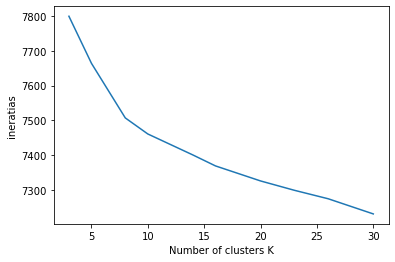

In [31]:
import matplotlib.pyplot as plt
plt.plot(n_cluster, ineratias)
plt.xlabel('Number of clusters K')
plt.ylabel('ineratias')

Text(0, 0.5, 'silhouette_score')

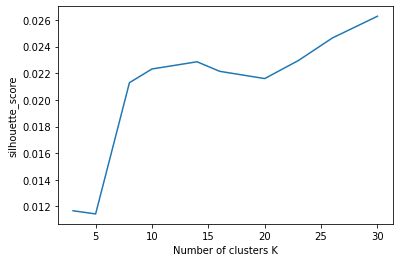

In [33]:
plt.plot(n_cluster, scores)
plt.xlabel('Number of clusters K')
plt.ylabel('silhouette_score')

In [34]:
from sklearn.cluster import KMeans
true_k=15
model = KMeans(n_clusters=true_k,init='k-means++',max_iter=300,n_init=10,random_state=0)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i,:7]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: cool look co like veri realli would
Cluster 1: today co music text may wa today cool
Cluster 2: cool co wa may like forgot fr
Cluster 3: music co listen like music appl like co music
Cluster 4: call text text call co bd call cool ba
Cluster 5: co cool cool co realli look bebe cool right
Cluster 6: co amazon amazon gt buy co amazon gt amazon gt co
Cluster 7: may allah may day bless day god co
Cluster 8: funni sport co co funni like wa think
Cluster 9: race someon heisman heisman week plaza trophi co talk last trask
Cluster 10: co song amp new listen holiday remix
Cluster 11: may co may co plea realli plea tree dear year
Cluster 12: text co back messag get like back text
Cluster 13: video music co video co video check america sport co video check
Cluster 14: may co get like one think know


In [6]:
%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
tweepy 3.9.0



<h2><font color ='FF5733'>7. Conclusion</font></h2>

Aprés avoir créer un compte twitter for devlopper on a obtenu les API Key afin de pouvoir collecter les tweets en utilisant <strong><span style='color:#F08080'> la bibliotheque tweepy </span></strong>.
<br>
Comme étape primordiale, il faut analyser les tweets et supprimer les données inutile tels que : <strong><span style='color:#F08080 '> URL, users,Number,Emojis... </span></strong>
<br>
Une fois le processus de netoyage des données est effectués, On passe maintenant a l'etape la plus importante pour le traitements de text <strong><span style='color:#F08080'> NLP:Natural language Processing </span></strong> en utlisant la bibliotheque <strong><span style='color:#F08080'> NLTK </span></strong>
Dans cette étape plusieurs processus auront lieu:  <strong><span style='color:#F08080'> Tokenization,Stemming,Lemmitization,Eliniation des stopwords </span></strong> Ce sont des etapes necessaires pour qu'on reussi l'analyse de text
<br>
Finalement une fois on a terminé, on passe à la vectorisation a fin de passer de l'echelle textuelle a l'echelle numérique pour pouvoir appliquer les differents algorithme de machine learning 
<br>
ET comme étape finale, on a appliquer l'algorithme  <strong><span style='color:#F08080'> Kmeans </span></strong> pour pouvoir grouper les diffenents tweets en des clusters dont chaque cluster regroupe les tweets similaires